# Débruitage d'une image avec ND-Safir (démonstration réplicable)

Nous reprenons un exemple de la page http://www.irisa.fr/vista/Themes/Demos/Debruitage/ImageDenoising.html.


## Introduction : API REST d'AllGo

AllGo possède une library python qui encapsule les appels HTTP REST.
Elle vous permet de soumettre des jobs, de suivre leur statut, etc. 

### Modules importés

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
import allgo

app = allgo.App(130) #app = allgo.App('ndsafir') 

### Récupération de l'image à traiter via son URL

Ci-dessous, entrez l'URL de l'image que vous souhaitez traiter en définissant **image_url=...**


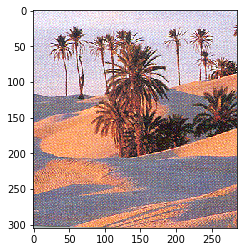

In [10]:
# Download image to be processed
#image_url = 'http://www.irisa.fr/vista/Themes/Demos/Debruitage/images/Glomeruli.png'
#image_url = 'http://www.irisa.fr/vista/Themes/Demos/Debruitage/images/Leaves_std30.png'
#image_url = 'http://www.irisa.fr/vista/Themes/Demos/Debruitage/images/Bridge_std20.png'
image_url = 'http://www.irisa.fr/vista/Themes/Demos/Debruitage/images/res_tunisie.png'

req = requests.get(image_url)
with open('tmp.png', 'wb') as f:  
    f.write(req.content)

img = mpimg.imread('tmp.png')
plt.imshow(img)

## Illustration du traitement

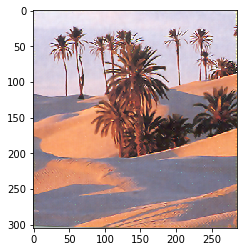

In [11]:
files = {'files[0]': open('tmp.png', 'rb')}
params = '-nopeaks 1 -2dt false -noise 0 -p 1 -bits 8 -iter 5 -adapt 0'
app.run(files=files, params=params)

img = mpimg.imread('output.png')
plt.imshow(img)

## Illustration du traitement en mode interactif 

En utilisant les curseurs (*slider*) ci-dessous, vous pouvez modifier le choix des 2 paramètres cles de ND-Safir, et visualiser les résultat (en cliquant sur "Run interact").

In [21]:
from ipywidgets import interact_manual

def ndsafir_for_interact(nbIter=4, patchParameter=1):
    files = {'files[0]': open('tmp.png', 'rb')}
    params = '-nopeaks {} -2dt false -noise {} -p {} -bits 8 -iter {} -adapt 0'.format(1, 0, patchParameter, nbIter)
    app.run(files=files, params=params)

    img = mpimg.imread('tmp.png')
    img_out = mpimg.imread('output.png')
    plt.gray()
    fig, axarr = plt.subplots(1, 2)
    axarr[0].imshow(img)
    axarr[1].imshow(img_out)
    fig.set_size_inches(10, 5)
    fig.tight_layout()

interact_manual(ndsafir_for_interact, nbIter=(1, 15), patch=(1, 4));

interactive(children=(IntSlider(value=4, description='nbIter', max=15, min=1), IntSlider(value=1, description='patchParameter', max=3, min=-1), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

## Illustration du traitement par balayage de paramètres

Après le mode interactif ci-dessus, voici maintenant une autre illustration des traitements de ND-Safir sur votre image, en balayant une liste prédéfinie de paramètres (les itérations sur cet exemple). 

Les images traitées seront affichées automatiquement dans des *subplots*.

Vous pouvez modifier la liste **iterations=...** ci-dessous.

*** Running ndsafir with 2 iterations
*** Running ndsafir with 4 iterations
*** Running ndsafir with 6 iterations
*** Running ndsafir with 8 iterations
*** Running ndsafir with 3 iterations


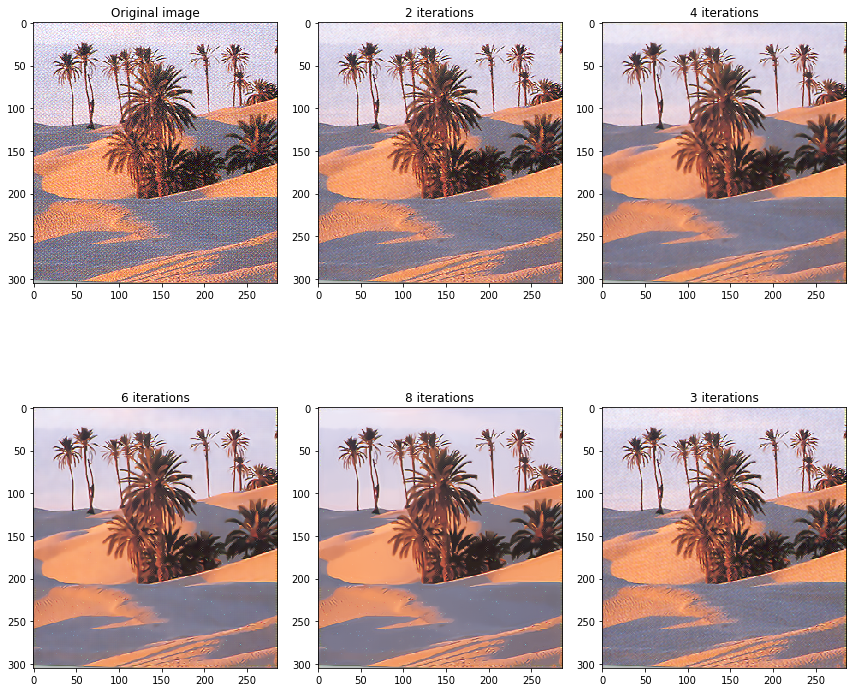

In [11]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> EDIT ME >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
iterations = [ 2, 4, 6, 8, 3 ]        # 5 valeurs max pour ce prototype
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

img_out = [mpimg.imread('tmp.png')]  

for it in iterations:
    print("*** Running ndsafir with {} iterations".format(it))
    files = {'files[0]' : open('tmp.png', 'rb')}
    params = '-nopeaks 1 -2dt false -noise 0 -p 1 -bits 8 -iter {} -adapt 0'.format(it)
    app.run(files=files, params=params)
    img_out.append(mpimg.imread('output.png'))

# plot the results
f = plt.figure(figsize=(12, 12))
plt.gray()
f.subplots_adjust(hspace=0)

for it in range(len(iterations)+1):
    f.add_subplot(2,3,it+1)
    plt.imshow(img_out[it])
    if (it==0):
        plt.title('Original image')
    else:
        plt.title('{} iterations'.format(iterations[it-1]))
f.tight_layout()